# 19기 KNN 정규세션 과제 - 19기 김은지

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. 데이터 파악

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [6]:
pd.DataFrame(df.isna().sum()/len(df), columns=['결측치 개수'])

,결측치 개수
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,0.306723


Product_Category_3의 결측치 비율은 약 69%, Product_Category_2의 결측치 비율은 약 31%

In [13]:
import numpy as np

In [26]:
category_feature = [ col for col in df.columns if df[col].dtypes == "object"]
#category_feature
numerical_feature = list(set(df.columns) - set(category_feature) - set(['User_ID']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Marital_Status', 'Occupation', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='<U18')

In [15]:
category_feature

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [9]:
len(df['User_ID'].unique()) # User_ID의 종류는 2656개

2656

In [10]:
len(df['Product_ID'].unique()) # Product_ID의 종류는 1797개

1797

In [16]:
len(df['Age'].unique()) # Age의 종류는 7개

7

In [20]:
df['Age'].unique()

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [19]:
print(len(df['City_Category'].unique())) # Age의 종류는 7개
df['City_Category'].unique()

3


array(['A', 'B', 'C'], dtype=object)

In [21]:
print(len(df['Stay_In_Current_City_Years'].unique())) # Age의 종류는 7개
df['Stay_In_Current_City_Years'].unique()

5


array(['3', '1', '2', '4+', '0'], dtype=object)

## 2. EDA

### 1. 단일변수 시각화
#### 1. 수치형 변수 histogram

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
# 한글깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [27]:
numerical_feature

array(['Marital_Status', 'Occupation', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='<U18')

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


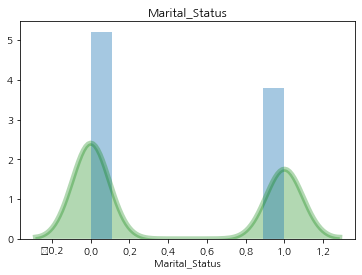

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


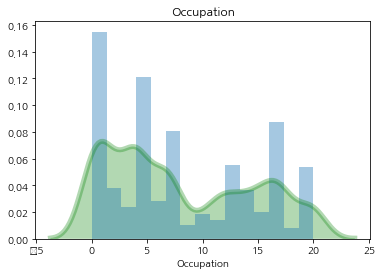

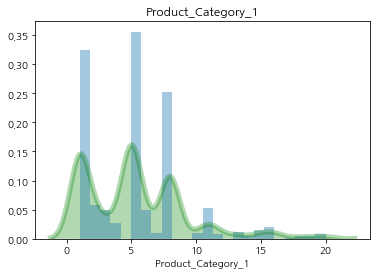

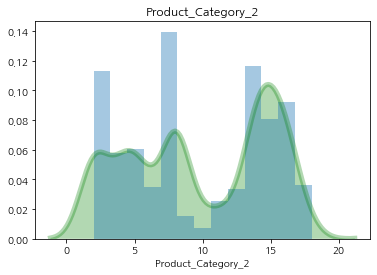

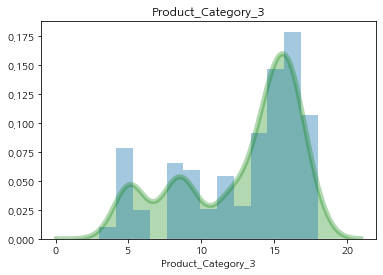

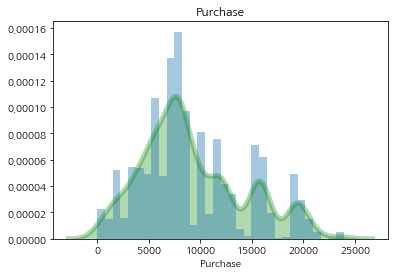

In [28]:
for i,col in enumerate(numerical_feature):
    sns.distplot(df.loc[df[col].notnull(), col], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("%s histogram"%col, fontsize=20)
    plt.title(col)
    plt.show()

#### 2. 수치형 변수 boxplot

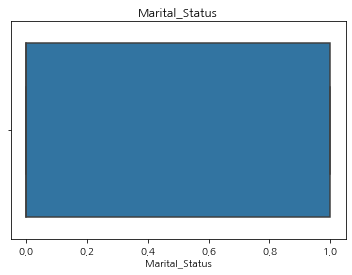

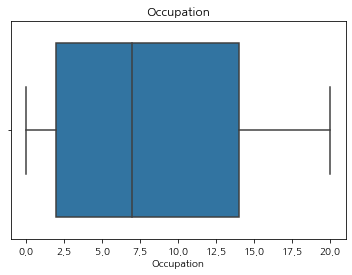

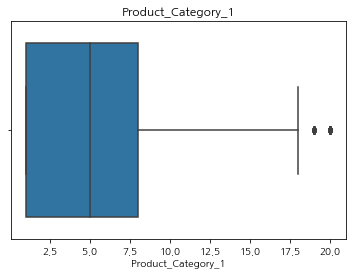

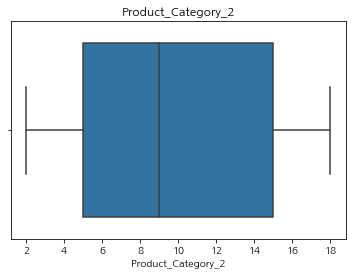

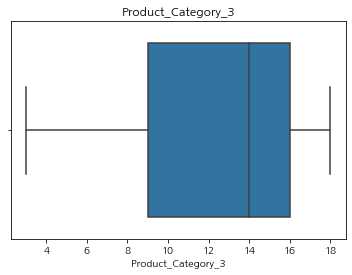

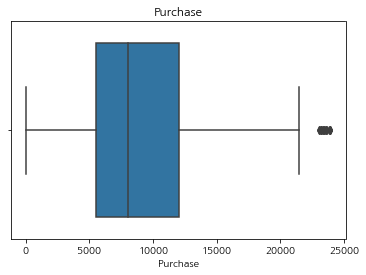

In [29]:
for i,col in enumerate(numerical_feature):
    sns.boxplot(df.loc[df[col].notnull(), col])
    plt.title("%s boxplot"%col, fontsize=20)
    plt.title(col)
    plt.show()

#### 3. 범주형 변수 barplot

In [30]:
category_feature

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [33]:
sns.set(font_scale = 5)

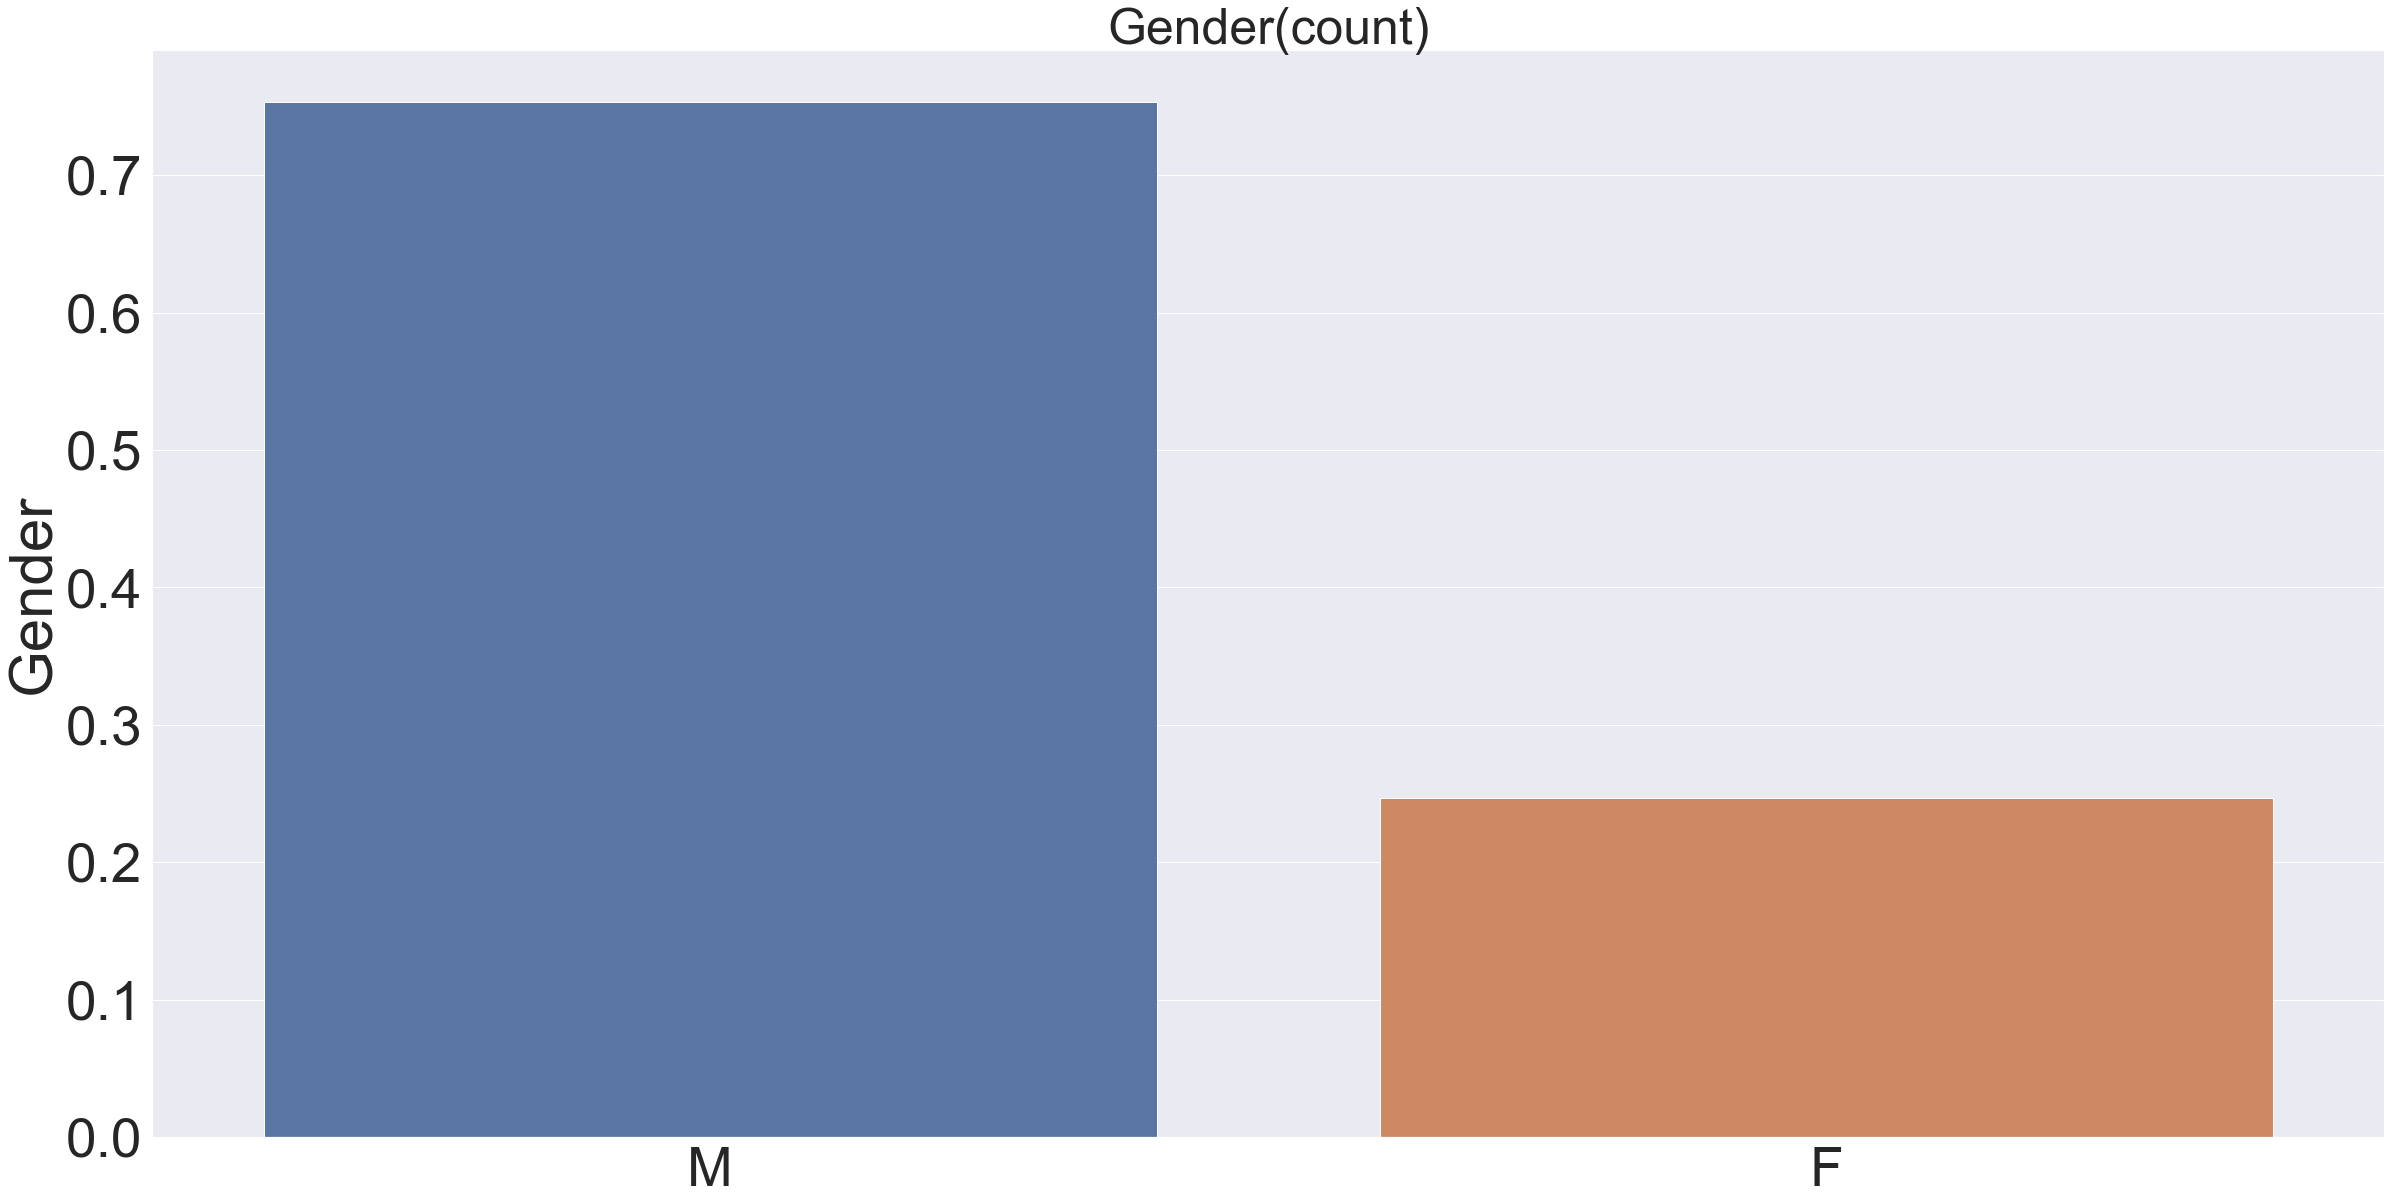

In [37]:
# Gender
vc_tmp = pd.DataFrame(df['Gender'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['Gender'] / sum(vc_tmp['Gender']))
plt.title("%s(count)"%'Gender', fontsize=50)
plt.show()

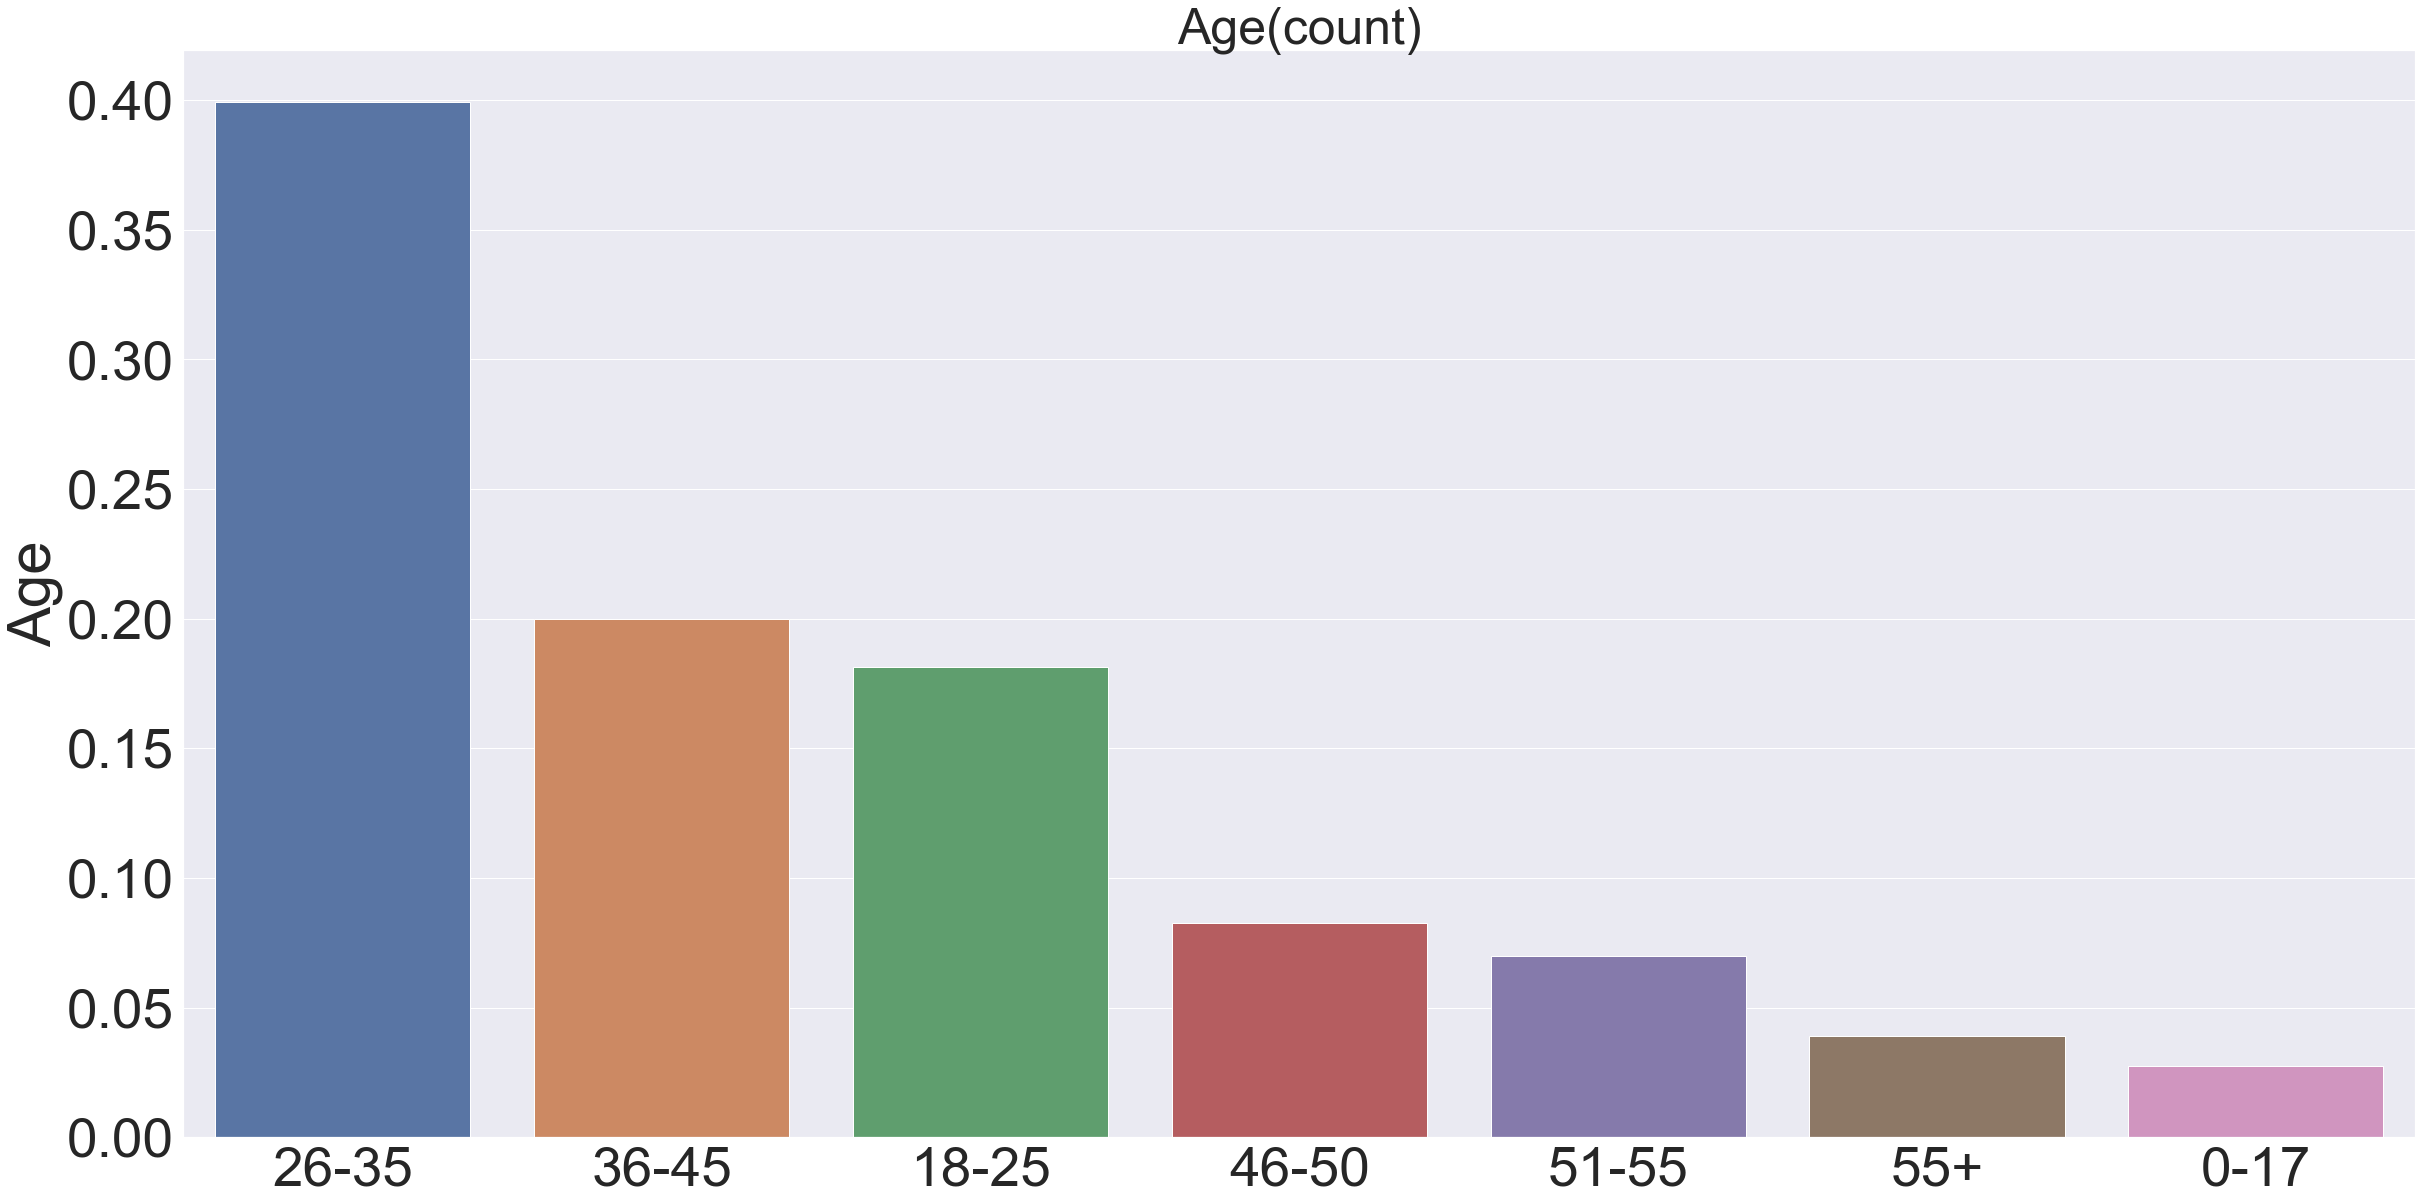

In [38]:
# Age
vc_tmp = pd.DataFrame(df['Age'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['Age'] / sum(vc_tmp['Age']))
plt.title("%s(count)"%'Age', fontsize=50)
plt.show()

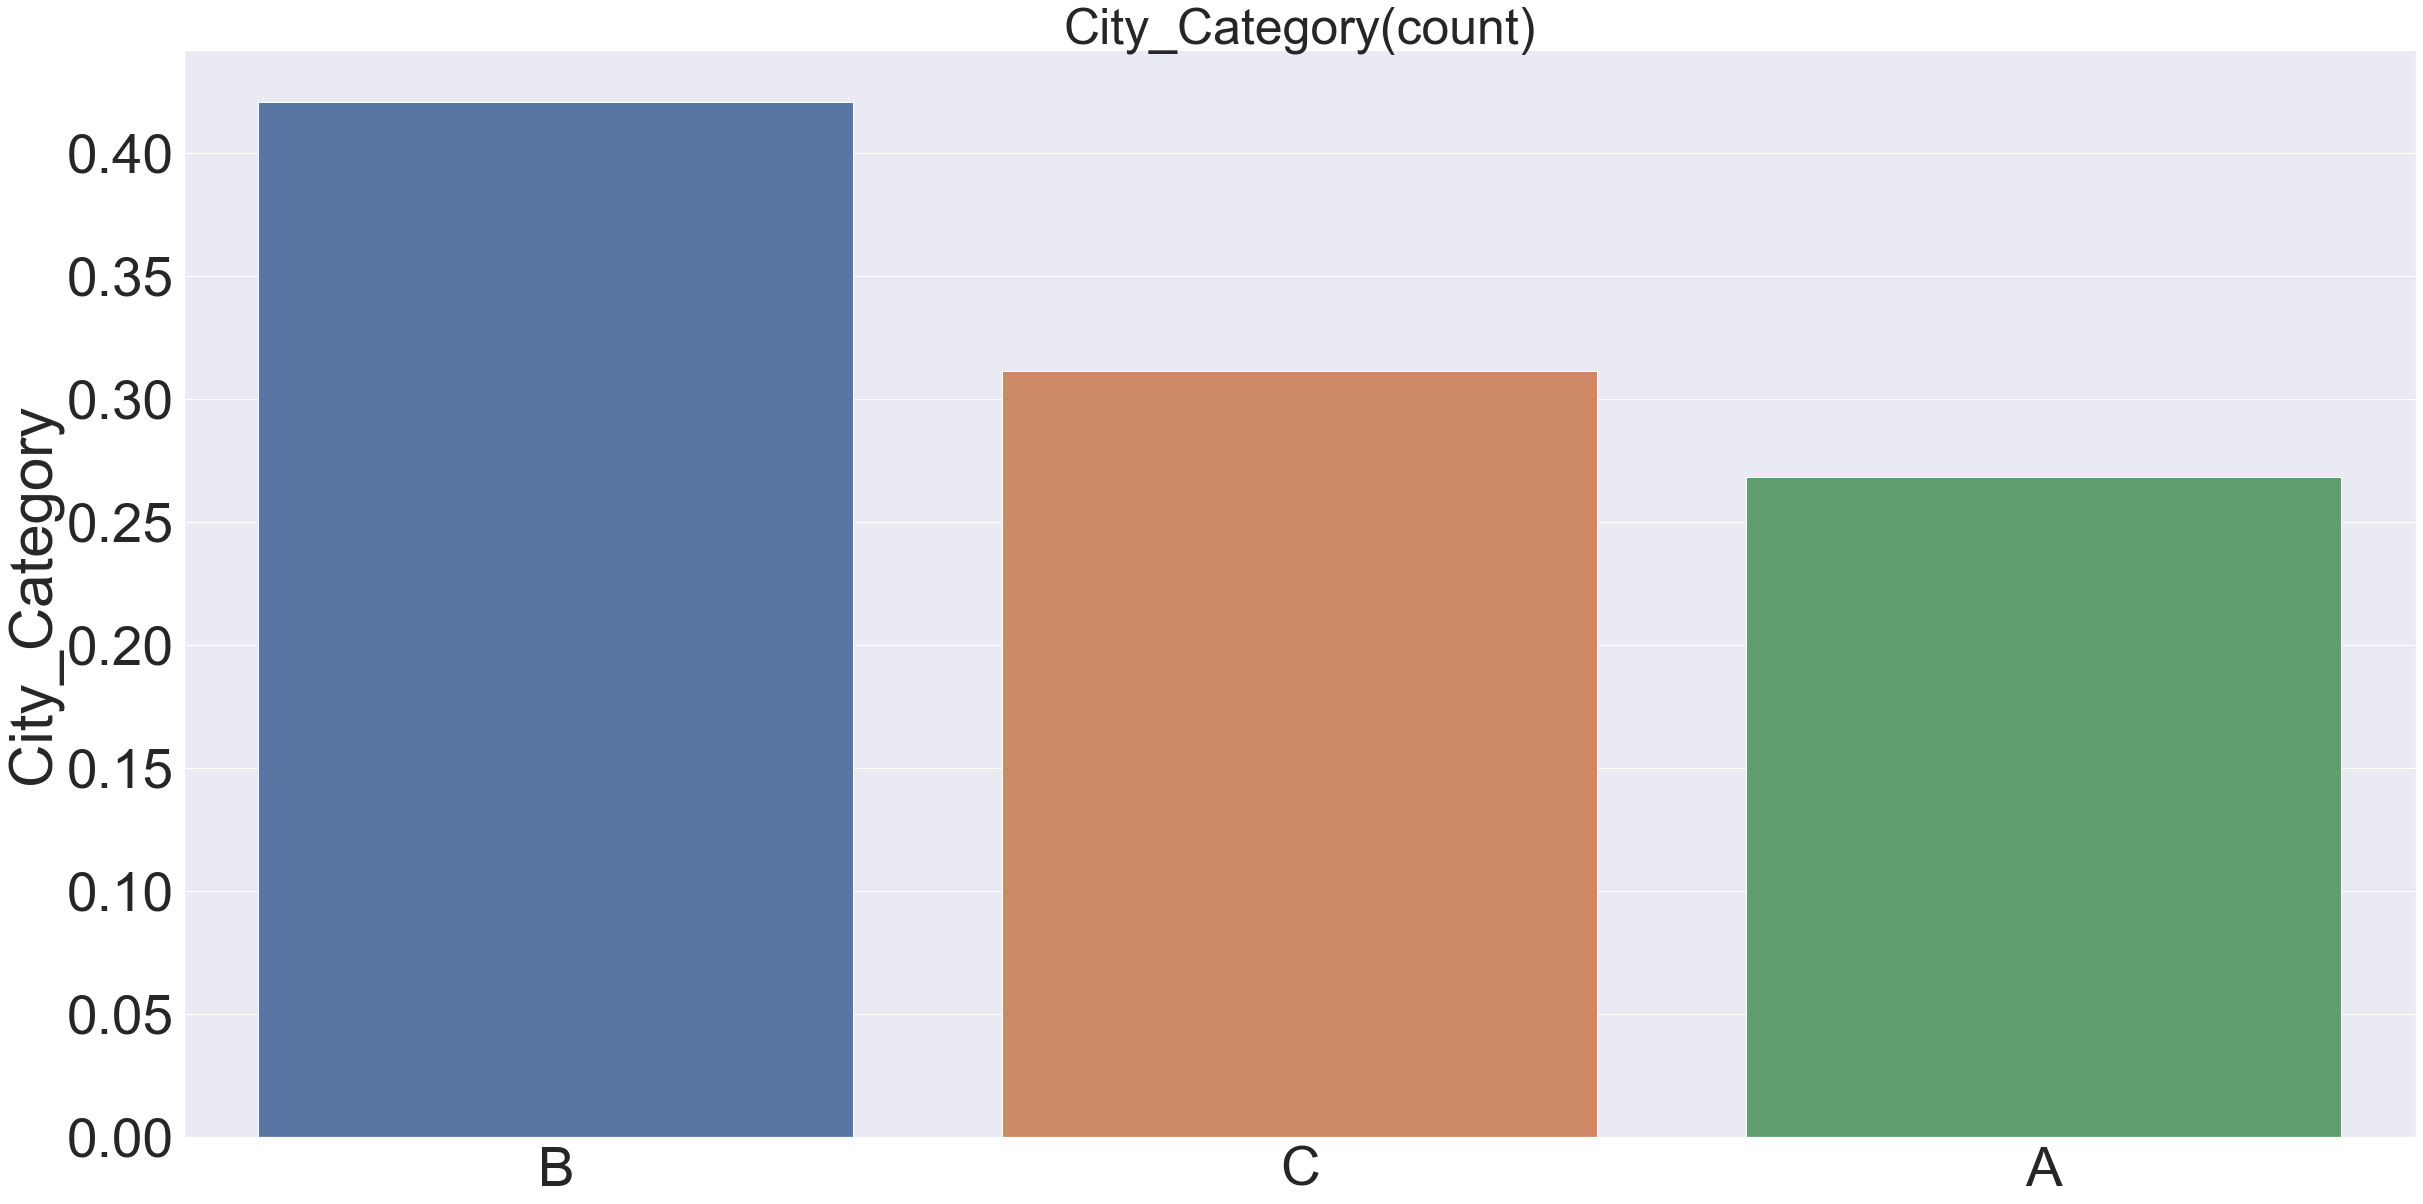

In [39]:
# City_Category
vc_tmp = pd.DataFrame(df['City_Category'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['City_Category'] / sum(vc_tmp['City_Category']))
plt.title("%s(count)"%'City_Category', fontsize=50)
plt.show()

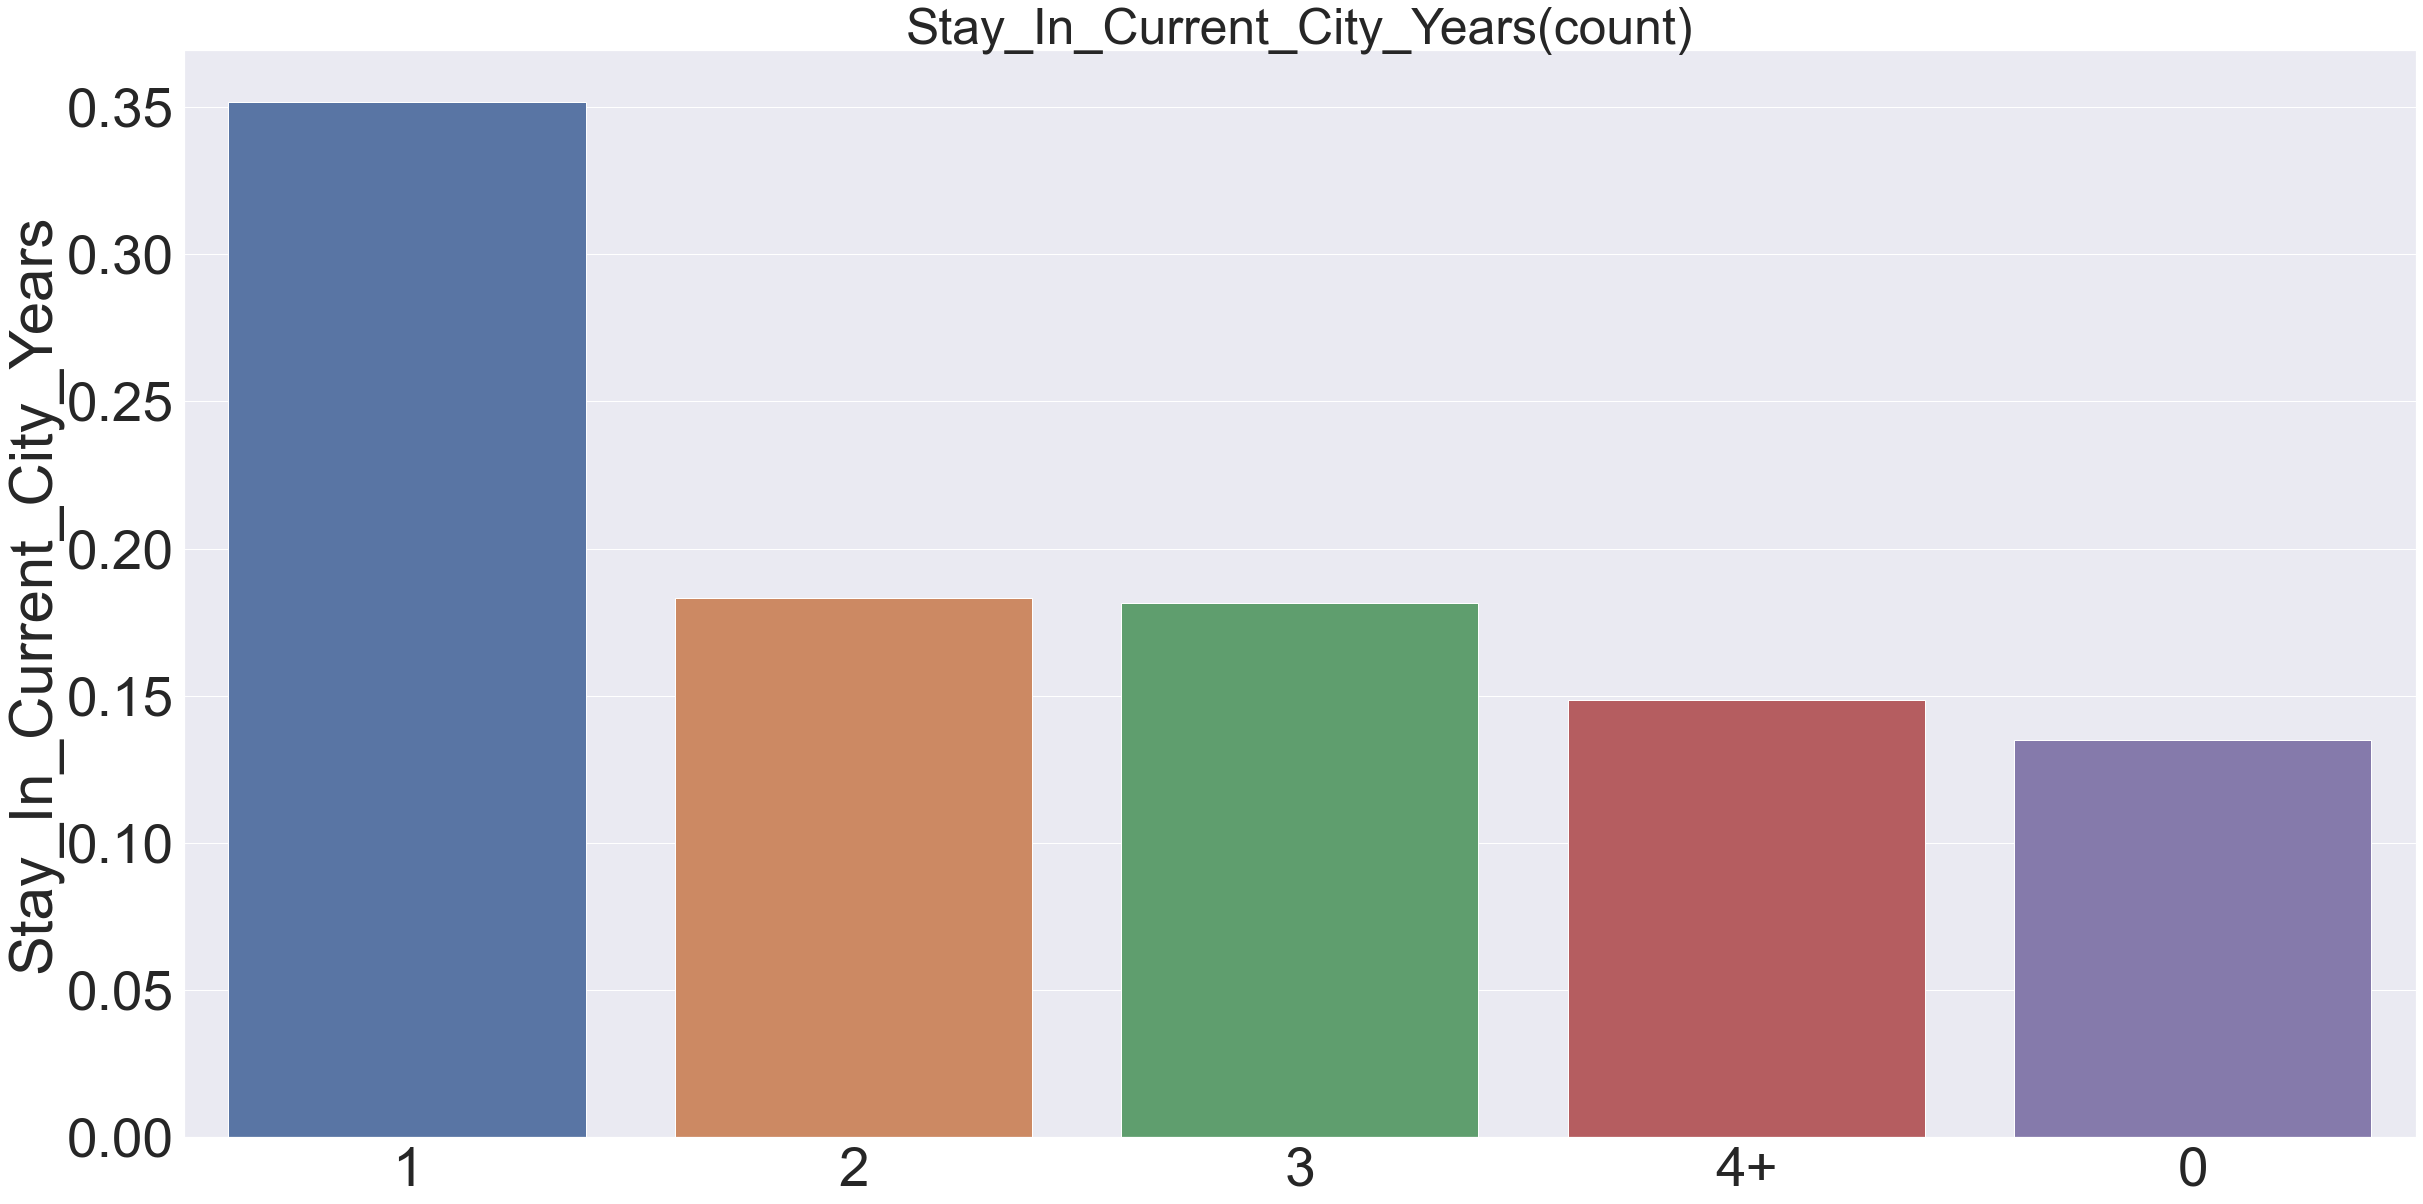

In [40]:
# Stay_In_Current_City_Years
vc_tmp = pd.DataFrame(df['Stay_In_Current_City_Years'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['Stay_In_Current_City_Years'] / sum(vc_tmp['Stay_In_Current_City_Years']))
plt.title("%s(count)"%'Stay_In_Current_City_Years', fontsize=50)
plt.show()

## 3. Preprocessing
전처리 단계에서는 먼저 범주가 많은 User_ID와 Product_ID를 제거하고 train, test split을 한다. <br>
train, test data를 나눈 후 결측치 대체를 진행한다.
결측치 대체는 평균으로 대체.


#### 1. User_ID, Product_ID 제거

In [45]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...
4993,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,M,55+,0,C,2,1,12,NaN,NaN,1413


#### 2. train, test data split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 808)
train_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
83,M,0-17,10,B,2,0,8,NaN,NaN,7787
2497,M,26-35,7,B,1,1,3,4.0,5.0,13541
102,M,0-17,10,C,4+,0,17,NaN,NaN,7702
4777,M,51-55,18,C,1,0,1,15.0,16.0,19260
2620,M,26-35,0,B,3,0,1,6.0,16.0,15828
...,...,...,...,...,...,...,...,...,...,...
84,M,0-17,10,B,2,0,2,4.0,9.0,6682
471,M,18-25,4,A,1,0,1,2.0,15.0,7590
4085,F,46-50,1,B,1,0,10,13.0,16.0,23904
3317,M,36-45,0,A,1,1,2,6.0,15.0,16126


In [48]:
test_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
480,M,18-25,6,A,4+,0,5,11.0,NaN,2004
4115,F,46-50,7,C,4+,1,8,13.0,NaN,6016
1398,F,26-35,1,C,2,1,5,14.0,NaN,7075
320,F,18-25,0,C,2,0,8,16.0,NaN,3891
1424,F,26-35,0,C,4+,0,1,16.0,NaN,11603


#### 2. one-hot encoding

In [49]:
train_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
83,M,0-17,10,B,2,0,8,NaN,NaN,7787
2497,M,26-35,7,B,1,1,3,4.0,5.0,13541
102,M,0-17,10,C,4+,0,17,NaN,NaN,7702
4777,M,51-55,18,C,1,0,1,15.0,16.0,19260
2620,M,26-35,0,B,3,0,1,6.0,16.0,15828
...,...,...,...,...,...,...,...,...,...,...
84,M,0-17,10,B,2,0,2,4.0,9.0,6682
471,M,18-25,4,A,1,0,1,2.0,15.0,7590
4085,F,46-50,1,B,1,0,10,13.0,16.0,23904
3317,M,36-45,0,A,1,1,2,6.0,15.0,16126


In [53]:
category_feature

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [54]:
train_df = pd.get_dummies(train_df, columns = ["Gender",'Age','City_Category','Stay_In_Current_City_Years'])
test_df = pd.get_dummies(test_df, columns = ["Gender",'Age','City_Category','Stay_In_Current_City_Years'])
train_df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
83,10,0,8,NaN,NaN,7787,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2497,7,1,3,4.0,5.0,13541,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
102,10,0,17,NaN,NaN,7702,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4777,18,0,1,15.0,16.0,19260,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
2620,0,0,1,6.0,16.0,15828,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,10,0,2,4.0,9.0,6682,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
471,4,0,1,2.0,15.0,7590,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4085,1,0,10,13.0,16.0,23904,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3317,0,1,2,6.0,15.0,16126,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [55]:
test_df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
480,6,0,5,11.0,NaN,2004,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4115,7,1,8,13.0,NaN,6016,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1398,1,1,5,14.0,NaN,7075,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
320,0,0,8,16.0,NaN,3891,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1424,0,0,1,16.0,NaN,11603,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,14,1,5,8.0,14.0,5348,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1242,1,1,1,2.0,5.0,8087,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4161,2,1,8,14.0,NaN,2225,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
174,2,1,8,14.0,NaN,7823,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 83 to 2510
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Occupation                     3998 non-null   int64  
 1   Marital_Status                 3998 non-null   int64  
 2   Product_Category_1             3998 non-null   int64  
 3   Product_Category_2             2770 non-null   float64
 4   Product_Category_3             1241 non-null   float64
 5   Purchase                       3998 non-null   int64  
 6   Gender_F                       3998 non-null   uint8  
 7   Gender_M                       3998 non-null   uint8  
 8   Age_0-17                       3998 non-null   uint8  
 9   Age_18-25                      3998 non-null   uint8  
 10  Age_26-35                      3998 non-null   uint8  
 11  Age_36-45                      3998 non-null   uint8  
 12  Age_46-50                      3998 non-null   

In [60]:
train_df["Product_Category_2"].mean()

9.752707581227437

In [61]:
test_df["Product_Category_2"].mean()

9.857553956834533

In [62]:
#age_mean으로 결측치를 채워넣음 (train & test)
train_df.loc[:, "Product_Category_2"] = train_df["Product_Category_2"].fillna(train_df["Product_Category_2"].mean())
test_df.loc[:, "Product_Category_2"] = test_df["Product_Category_2"].fillna(test_df["Product_Category_2"].mean())

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 83 to 2510
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Occupation                     3998 non-null   int64  
 1   Marital_Status                 3998 non-null   int64  
 2   Product_Category_1             3998 non-null   int64  
 3   Product_Category_2             3998 non-null   float64
 4   Product_Category_3             1241 non-null   float64
 5   Purchase                       3998 non-null   int64  
 6   Gender_F                       3998 non-null   uint8  
 7   Gender_M                       3998 non-null   uint8  
 8   Age_0-17                       3998 non-null   uint8  
 9   Age_18-25                      3998 non-null   uint8  
 10  Age_26-35                      3998 non-null   uint8  
 11  Age_36-45                      3998 non-null   uint8  
 12  Age_46-50                      3998 non-null   

In [64]:
train_df["Product_Category_3"].mean()

12.825141015310233

In [65]:
test_df["Product_Category_3"].mean()

12.528052805280527

In [66]:
#age_mean으로 결측치를 채워넣음 (train & test)
train_df.loc[:, "Product_Category_3"] = train_df["Product_Category_3"].fillna(train_df["Product_Category_3"].mean())
test_df.loc[:, "Product_Category_3"] = test_df["Product_Category_3"].fillna(test_df["Product_Category_3"].mean())

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 83 to 2510
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Occupation                     3998 non-null   int64  
 1   Marital_Status                 3998 non-null   int64  
 2   Product_Category_1             3998 non-null   int64  
 3   Product_Category_2             3998 non-null   float64
 4   Product_Category_3             3998 non-null   float64
 5   Purchase                       3998 non-null   int64  
 6   Gender_F                       3998 non-null   uint8  
 7   Gender_M                       3998 non-null   uint8  
 8   Age_0-17                       3998 non-null   uint8  
 9   Age_18-25                      3998 non-null   uint8  
 10  Age_26-35                      3998 non-null   uint8  
 11  Age_36-45                      3998 non-null   uint8  
 12  Age_46-50                      3998 non-null   

In [68]:
train_target = train_df['Purchase']
test_target = test_df['Purchase']
train_data = train_df.drop('Purchase', axis=1)
test_data = test_df.drop('Purchase', axis=1)

In [99]:
train_target

83       7787
2497    13541
102      7702
4777    19260
2620    15828
        ...  
84       6682
471      7590
4085    23904
3317    16126
2510    11664
Name: Purchase, Length: 3998, dtype: int64

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 83 to 2510
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Occupation                     3998 non-null   int64  
 1   Marital_Status                 3998 non-null   int64  
 2   Product_Category_1             3998 non-null   int64  
 3   Product_Category_2             3998 non-null   float64
 4   Product_Category_3             3998 non-null   float64
 5   Gender_F                       3998 non-null   uint8  
 6   Gender_M                       3998 non-null   uint8  
 7   Age_0-17                       3998 non-null   uint8  
 8   Age_18-25                      3998 non-null   uint8  
 9   Age_26-35                      3998 non-null   uint8  
 10  Age_36-45                      3998 non-null   uint8  
 11  Age_46-50                      3998 non-null   uint8  
 12  Age_51-55                      3998 non-null   

In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 480 to 878
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Occupation                     1000 non-null   int64  
 1   Marital_Status                 1000 non-null   int64  
 2   Product_Category_1             1000 non-null   int64  
 3   Product_Category_2             1000 non-null   float64
 4   Product_Category_3             1000 non-null   float64
 5   Gender_F                       1000 non-null   uint8  
 6   Gender_M                       1000 non-null   uint8  
 7   Age_0-17                       1000 non-null   uint8  
 8   Age_18-25                      1000 non-null   uint8  
 9   Age_26-35                      1000 non-null   uint8  
 10  Age_36-45                      1000 non-null   uint8  
 11  Age_46-50                      1000 non-null   uint8  
 12  Age_51-55                      1000 non-null   

## 3. KNN

####  기본 KNN

In [106]:
#knn 시작
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

In [107]:
#그리드서치를 위한 파라미터 설정
params_1 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform']
}

In [108]:
params_1

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'p': [1, 2],
 'weights': ['uniform']}

In [109]:
grid_cv = GridSearchCV(knn, param_grid = params_1, cv = 3)

In [110]:
grid_cv.fit(train_data, train_target)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform']})

In [111]:
grid_cv.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}

In [133]:
knn_1 = KNeighborsRegressor(n_neighbors = 13, p = 1, weights = 'uniform')
knn_1.fit(train_data, train_target)

KNeighborsRegressor(n_neighbors=13, p=1)

In [134]:
#예측 진행
test_pred = knn_1.predict(test_data)

In [135]:
test_pred

array([ 7008.23076923,  7125.61538462,  8027.61538462,  9421.76923077,
       14188.23076923, 13538.        ,  7311.69230769,  6638.46153846,
        8281.15384615, 14724.53846154,  8607.15384615, 13196.84615385,
        9116.61538462,  6219.30769231,  7167.53846154,  7783.15384615,
       14700.46153846, 14701.76923077, 13774.46153846,  7935.07692308,
        4856.61538462,  5229.84615385,  8038.46153846,  7542.07692308,
        4861.30769231,  5302.23076923, 15224.84615385,  6044.38461538,
        8305.23076923,  6897.23076923,  6637.38461538,  8641.        ,
        7028.38461538,  7689.84615385, 11528.30769231,  9771.53846154,
        7338.84615385,  9028.61538462,  7157.38461538,  8648.84615385,
       12050.15384615,  7519.07692308, 10634.        , 15532.07692308,
        7843.        ,  6016.76923077,  7802.23076923,  7875.69230769,
        3985.        ,  5335.92307692, 11916.07692308, 12455.76923077,
        6739.84615385,  6801.38461538,  6353.76923077,  8750.46153846,
      

In [136]:
np.array(test_target)

array([ 2004,  6016,  7075,  3891, 11603, 15168,  9745,  7063,  5966,
       15181,  9986, 11925,  6099,  5209,  3522,  4584, 19201, 11869,
       15321,  8025,  6042,  1731,  6048,  7132,    62,  5940, 15552,
        5265,  7859,  9698,  7122,  7129,  8111,  9920,  5668, 11069,
        7816,  5996,  3923,  8251, 10971,  7877, 12118, 12801,  5924,
        3494,  8009, 20676,   767,  3570, 11422, 11677,   766,  3461,
        6934, 13275, 19074,  6978, 11870,  8073, 11672, 10955,  5473,
       10673,  3443,  7184,  7834,  9944,  6906,  5259, 19133,  4300,
        7962, 23338, 19096,  7005,  7052, 15243,  9765,  2856,  5270,
        7179,  1831,  7776,  8590,  9736,  6084,  4021,  7992, 13148,
        8738, 15214,  7159,  6026,  6871,  9703, 11714,  5988,  6871,
       15421, 15379, 18974, 19178,  8688,  9725, 19548,  2782,  6967,
       11695, 11635,  7818,  4493, 15989,  5164, 11485, 19043,  7768,
        6025,  6978,  7811,  5274,  6944, 15646,  7881,  7144, 13160,
        6886,  3976,

In [137]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(test_target, test_pred) 

print("knn1 rmse score : ", np.sqrt(MSE))


knn1 rmse score :  3782.2330772563855


In [138]:
from sklearn.metrics import r2_score
r2_score(test_target, test_pred)

0.3817325198112749

#### weighted KNN

In [139]:
#가중치를 부여하는 경우 파라미터 조정 (그리드서치)
params_2 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['distance']
}

In [140]:
grid_cv = GridSearchCV(knn, param_grid = params_2, cv = 3)

In [141]:
grid_cv.fit(train_data, train_target)
grid_cv.best_params_

{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

In [144]:
knn_2 = KNeighborsRegressor(n_neighbors = 15, p =1, weights = 'distance')
knn_2.fit(train_data, train_target)

KNeighborsRegressor(n_neighbors=15, p=1, weights='distance')

In [146]:
#예측 진행
test_pred = knn_2.predict(test_data)

In [147]:
MSE = mean_squared_error(test_target, test_pred) 

print("knn2 rmse score : ", np.sqrt(MSE))


knn1 rmse score :  3737.754821977047


In [148]:
r2_score(test_target, test_pred)

0.39618840572181735

#### Scaling

In [149]:
#변수 스케일링을 사용하는 경우
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [150]:
#train과 test 모두 스케일링 진행
scaler.fit(train_data)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [151]:
params_3 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform','distance']
}

In [152]:
params_3

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [153]:
grid_cv = GridSearchCV(knn, param_grid = params_3, cv = 3)
grid_cv.fit(scaled_train_data, train_target)
grid_cv.best_params_

{'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

In [154]:
knn_3 = KNeighborsRegressor(n_neighbors = 19, p = 1, weights = 'distance')
knn_3.fit(scaled_train_data, train_target)

KNeighborsRegressor(n_neighbors=19, p=1, weights='distance')

In [155]:
#예측 진행
test_pred = knn_3.predict(scaled_test_data)

In [156]:
MSE = mean_squared_error(test_target, test_pred) 

print("knn3 rmse score : ", np.sqrt(MSE))


knn3 rmse score :  4518.613117122952


In [157]:
r2_score(test_target, test_pred)

0.11754992459091573